## CONTEXT :
Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, 
as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient
supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the
detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [4]:
# importing  importent  libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [5]:
# loading Dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

In [7]:
#  it contains 200 rows and we have 3 features i.e Tv, Radio and Newspaper 
# column with name='Unnamed: 0' is of no use so we'll delete it
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# as we can see unnecessary column has been removed,so we'll proceed further
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
# Here we can see there is no null values
 
# checking stats
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='sales'>

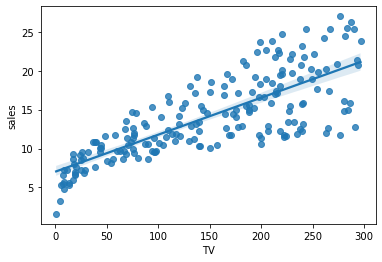

In [11]:
#Checking relationship of each feature with label 

sns.regplot(x='TV' , y='sales' , data = df )

<AxesSubplot:xlabel='radio', ylabel='sales'>

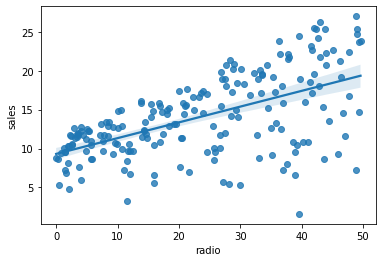

In [12]:
#Checking relationship of each feature with label 

sns.regplot(x='radio' , y='sales' , data = df )

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

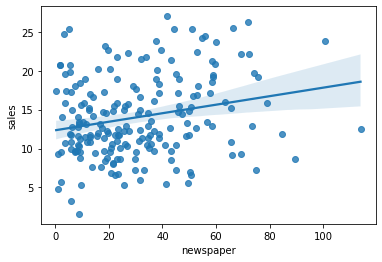

In [13]:
#Checking relationship of each feature with label 

sns.regplot(x='newspaper' , y='sales' , data = df )

### Observation
Tv and Radio have some kind of relation with sales but newspaper relationship with sales is quiet disoriented (seems it don't have any relationship with sales)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

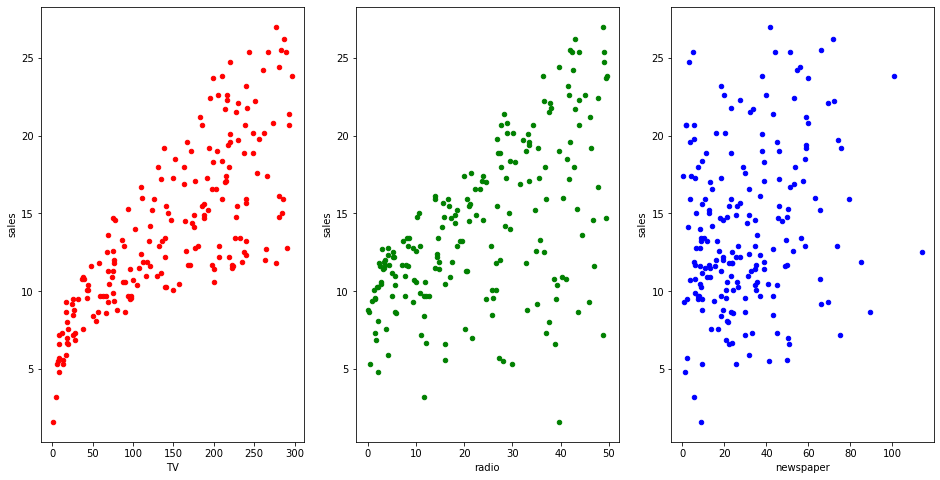

In [14]:
# plotting all at once
fig, axs = plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8) ,color='r')
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8),color='g')
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2],figsize=(16,8),color='b')

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

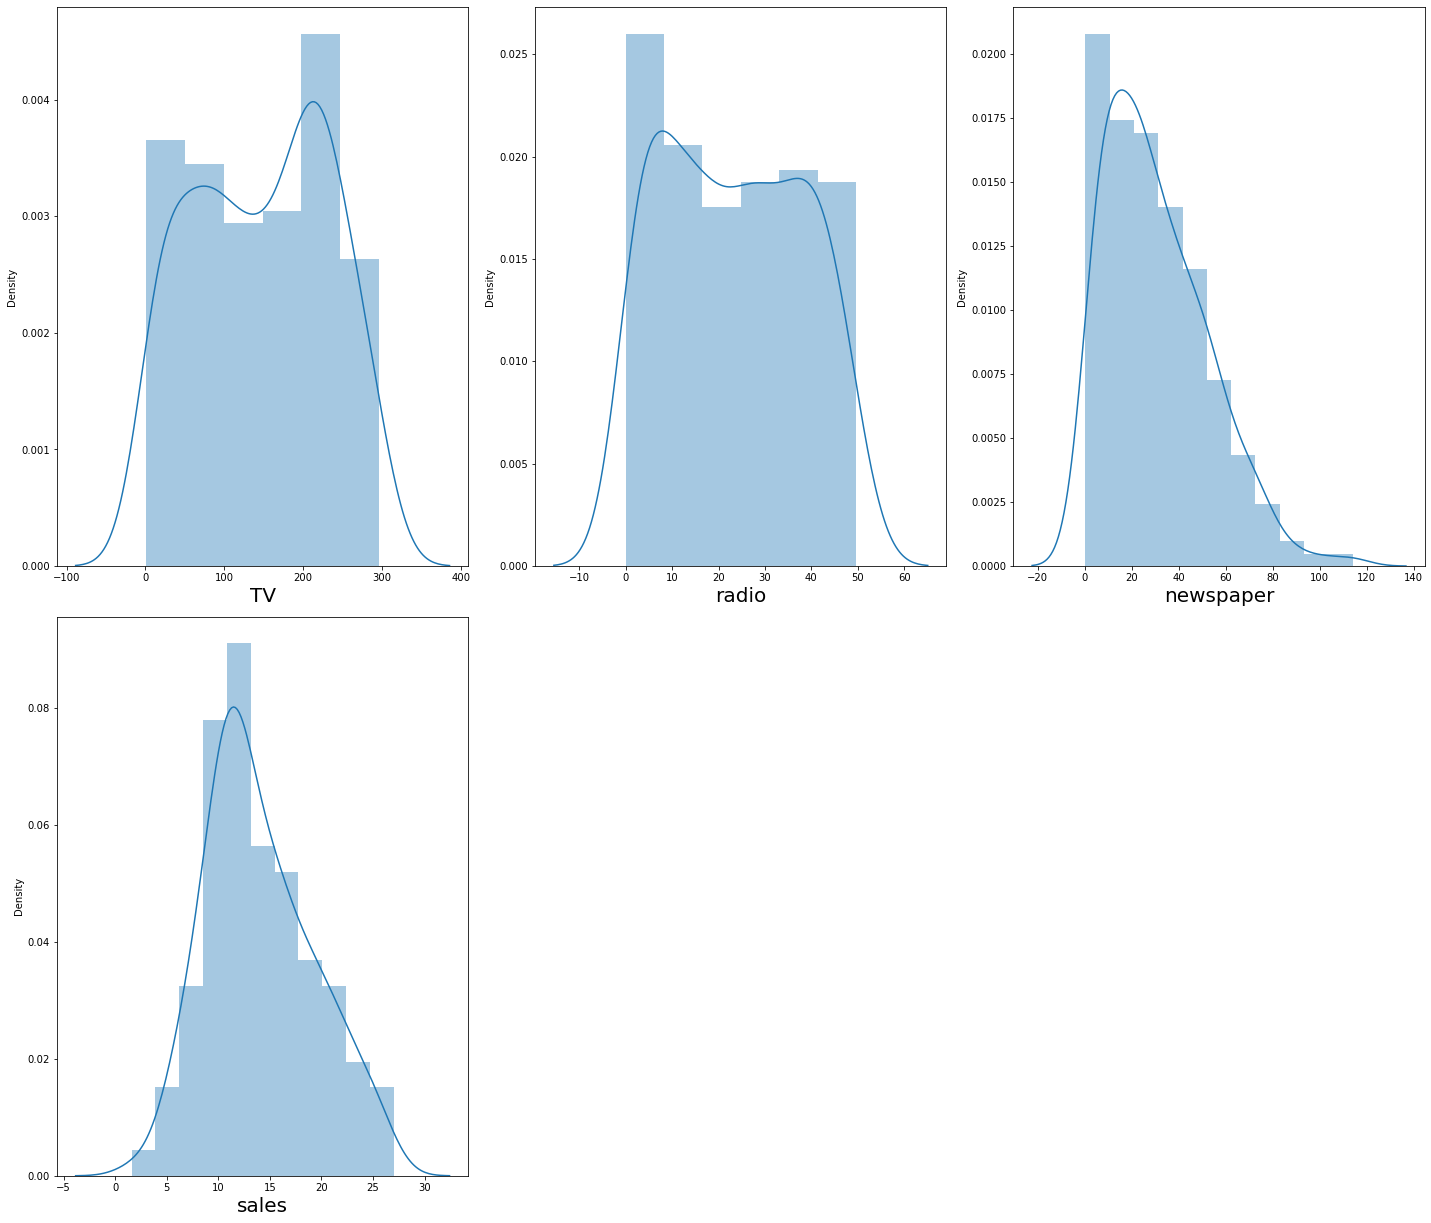

In [15]:
# Tv seems to have strong relationship with sales
#Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

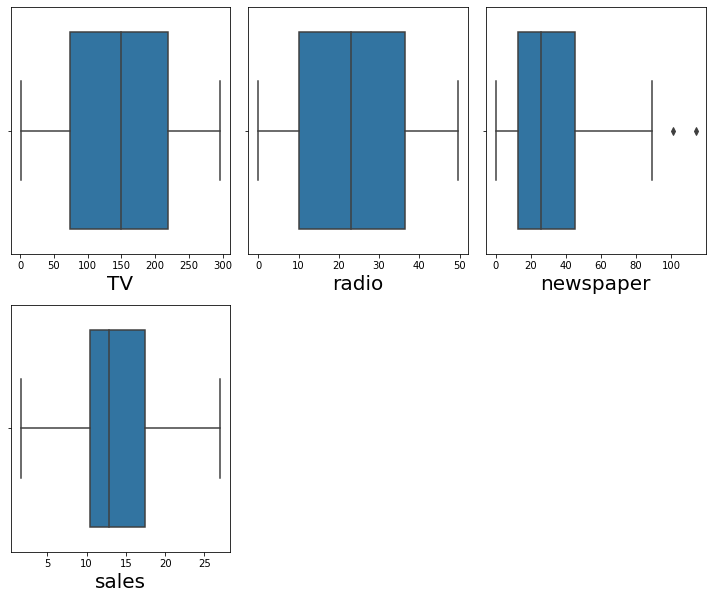

In [16]:
#  Distribution seems to be fine but lets check for any outlier if any
plt.figure(figsize=(10,12))

plotnumber=1

for column in df:
    if plotnumber<=9 : 
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

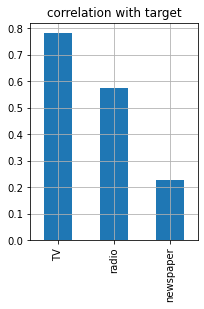

In [17]:
# There is no considerable amount of outlier , it's wise to proceed further
# vissualization
df.drop('sales',axis=1).corrwith(df.sales).plot(kind='bar',grid=True,figsize=(3,4),title='correlation with target')
plt.show()

In [18]:
# Tv is highly correlated with sales
#newspaper show least correlation

## Model Building

In [19]:
#Splitting data into and training and testing

x = df.drop(columns=['sales'])
y = df['sales']

#Scaling Data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled.shape

(200, 3)

In [20]:
# Regression Model Function
# this function will define all important parameter
def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [21]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [22]:
# Linear Regression Model

model=LinearRegression()
reg(model, x, y)

RMSE Score is: 1.5287414909541597
R2 Score is: 90.4190826557818
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 1.7084477013974606


In [23]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 1.1456439237389604
R2 Score is: 94.619305930322
Cross Validation Score: 94.53548966752793
R2 Score - Cross Validation Score is 0.08381626279407328


In [24]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 2.9150210422469187
R2 Score is: 65.16447371257946
Cross Validation Score: 61.25510867901782
R2 Score - Cross Validation Score is 3.9093650335616417


In [25]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x, y)

RMSE Score is: 3.119035248696988
R2 Score is: 60.11775899226557
Cross Validation Score: 61.41199872269792
R2 Score - Cross Validation Score is -1.294239730432352


In [26]:
# as we can see linear regression have best performance
# best r2 score,rmse
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=45)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     365.5
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           7.12e-65
Time:                        20:01:00   Log-Likelihood:                -276.92
No. Observations:                 140   AIC:                             561.8
Df Residuals:                     136   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0110      0.151     92.970      0.000      13.713      14.309
x1             4.0263      0.149     26.960      0.000       3.731       4.322
x2             2.6859      0.159     16.870      0.000       2.371       3.001
x3            -0.1850      0.152     -1.219      0.225      -0.485       0.115
==============================================================================
Omnibus:                       45.168   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.721
Skew:                          -1.344   Prob(JB):                     3.00e-23
Kurtosis:                       6.249   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
lr.score(X_train,Y_train)

0.8896590670217261

In [29]:
print ('sales : ' , lr.predict(scalar.transform([[445.1,85.89,52]])))

sales :  [39.19921896]


/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
#Saving and loading Model

from joblib import dump, load

final_model=LinearRegression()
final_model.fit(x,y)
dump(final_model, 'Advt_Sales.lib')

['Advt_Sales.lib']

In [31]:
# To load model
load_model=load('Advt_Sales.lib')

In [32]:
# making prediction using saved model
sales=[[29408.5,  4652.8, 6110.8]]
load_model.predict(sales)

/Users/shubh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2219.66101548])